### Student Information
Name: 黃雅琳

Student ID: 108061613

GitHub ID: lilyQUQ

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [1]:
# import module
from sklearn.datasets import fetch_20newsgroups
import glob
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np
import matplotlib.pyplot as plt
import nltk  #tokenization
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.feature_extraction.text import CountVectorizer
#import dmh_new_data as dmh2  #new function I wrote.

### Begin Assignment Here


In [2]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

#### Exercise 1:

In [3]:
# Answer here
for t in twenty_train.data[:3]:
    print(t)
    #print(twenty_train.target_names[t])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

#### Exercise 2:

In [5]:
#Answer here
print(X.iloc[1])
print('=====================')
print(X.loc[1,:])
print('=====================')
print( X.loc[lambda df: df.category > 0, :][:5])
print('=====================')
X.category.loc[lambda s: s > 2][:5]


text             From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
category                                                         1
category_name                                        comp.graphics
Name: 1, dtype: object
text             From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
category                                                         1
category_name                                        comp.graphics
Name: 1, dtype: object
                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion

2    3
3    3
4    3
5    3
6    3
Name: category, dtype: int64

#### Exercise 3:

In [6]:
# Answer here
#X['graphics'] = comp.graphics
#X.loc['comp.graphics'].iloc[::10,:][:5]
##
X.loc[lambda f: f.category_name == 'comp.graphics'].iloc[::10,:][:5]

text  category  \
0    From: sd345@city.ac.uk (Michael Collier) Subje...         1   
43   From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...         1   
76   From: sts@mfltd.co.uk (Steve Sherwood (x5543))...         1   
107  From: samson@prlhp1.prl.philips.co.uk (Mark Sa...         1   
172  From: thinman@netcom.com (Technically Sweet) S...         1   

     category_name  
0    comp.graphics  
43   comp.graphics  
76   comp.graphics  
107  comp.graphics  
172  comp.graphics

#### Exercise 5:

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

 Answer :
since 'NaN','','nan' are string, so the functin isnull() will not take them as missing values but real record.

In [9]:
print(type(''),type('NaN'),type('nan'))

<class 'str'> <class 'str'> <class 'str'>


#### Exercise 6:

Answer here
 1. The function ,DataFrame.sample(), not only narrow down the size of the dataset, but also randomize the sampled dataset.  we can oberserve this by printing out original dataset,X, and sampled dataset. (see results below.)  
 2.

In [10]:
X_sample = X.sample(n=1000)
X_sample.loc[::10,:][0:5]

text  category  \
2038  From: lieuwen@allegra.att.com (Dan Lieuwen) Su...         3   
136   From: jim.zisfein@factory.com (Jim Zisfein)  S...         2   
1200  From: eliezer@physics.llnl.gov (David A Elieze...         2   
43    From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...         1   
484   From: cpage@two-step.seas.upenn.edu (Carter C....         3   

               category_name  
2038  soc.religion.christian  
136                  sci.med  
1200                 sci.med  
43             comp.graphics  
484   soc.religion.christian

In [11]:
X.loc[::10,:][0:5]

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3   
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...         2   
40  From: david-s@hsr.no (David A. Sjoen) Subject:...         3   

             category_name  
0            comp.graphics  
10  soc.religion.christian  
20  soc.religion.christian  
30                 sci.med  
40  soc.religion.christian

In [12]:
X[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian

In [13]:
X_sample[0:4]

text  category  \
2038  From: lieuwen@allegra.att.com (Dan Lieuwen) Su...         3   
397   From: David.Bernard@central.sun.com (Dave Bern...         3   
1405  From: aa888@freenet.carleton.ca (Mark Baker) S...         3   
1713  From: cs89mcd@brunel.ac.uk (Michael C Davis) S...         3   

               category_name  
2038  soc.religion.christian  
397   soc.religion.christian  
1405  soc.religion.christian  
1713  soc.religion.christian

##### Exercise 7:
if we just delete the constraint on y-lim, the axis limit will be automatedly decide.  

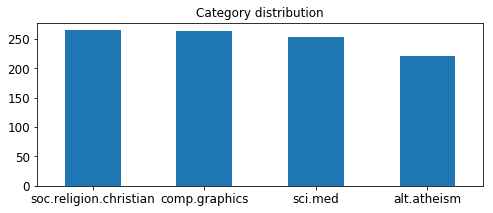

In [14]:
# Answer here
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',                                            
                                           rot = 0, fontsize = 12, figsize = (8,3))
# plot barchart for X_sample

#### Exercise 8:

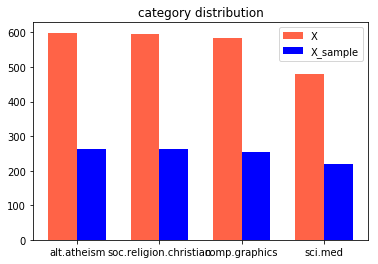

In [15]:
# Answer here
sample_count = X_sample.category_name.value_counts()
count = X.category_name.value_counts()

fig, ax = plt.subplots()
ind = np.arange(len(categories))
width = 0.35
bottom = 0.35

for (c1,c2,index) in zip(count,sample_count,ind):
    p1 = ax.bar(index, c1, width,bottom,color = 'tomato')
    p2 = ax.bar(index+width, c2, width,bottom ,color = 'blue')

ax.set_title('category distribution')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(categories)

ax.legend((p1[0], p2[0]), ('X', 'X_sample'))
ax.autoscale_view()

plt.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()

#### Exercise 9:

In [17]:
# Answer here
'''for sample in X.text[:2]:
    print(sample)
    analyze(sample)'''
print(len(analyze(''.join(list(X.text)))))
analyze(''.join(list(X.text)))[:10] #analyze只能分析str(text)->分成很多詞段

691079


['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images']

#### Exercise 10:
Ans. the second 1 in the record represents to '01'.

In [18]:
# Answer here
print(X.shape)
print(X_counts.shape)
print(len(count_vect.get_feature_names()))
print(len(analyze(''.join(list(X.text)))))
print('====================================')
x_counts = X_counts[4, 0:100].toarray().squeeze()
tmp = list( map(lambda x,y: y if x==1 else '' ,x_counts,count_vect.get_feature_names()[0:100]) )
print(tmp)



(2257, 3)
(2257, 35788)
35788
691079
['00', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '01', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


#### Exercise 11:

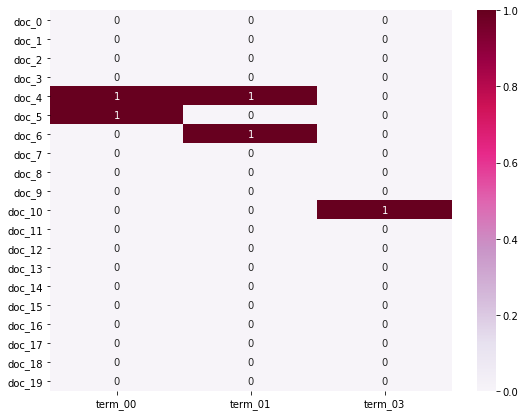

In [19]:
import seaborn as sns
##A . Trying to plot the larger sample size and feature size, while eleminate the feature didn't exist in the documents we chose.

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:120]] # feature 
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]                  # doc
plot_z = X_counts[0:20, 0:120].toarray()                                 # count
locat =  np.where(plot_z>0)
#print(locat)
plot_x = np.array(plot_x)[np.unique(locat[1])]
#plot_y = np.array(plot_y)[np.unique(locat[0])]
#print(np.arange(120)[np.unique(locat[0])])

col = np.delete(np.arange(100),np.unique(locat[0]))
row = np.delete(np.arange(120),np.unique(locat[1]))
plot_z2 = np.delete(plot_z, row, axis = 1)

df_todraw = pd.DataFrame(plot_z2, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
plt.show()


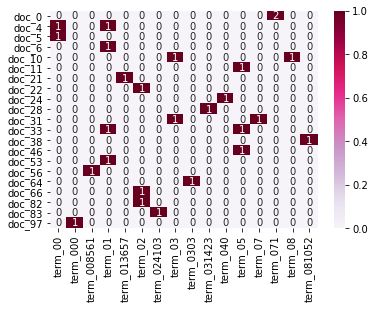

In [20]:
##B. Trying to plot the heat plot for the first 100 docs and first 200 features, 
#    while eliminate the feature didn't exist in the fist 200 features of docs
#    and eliminate the docs in which the first 120 features don't exist.
ind_feat = 200
ind_doc = 100
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:ind_feat]] # feature 
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:ind_doc]]                  # doc
plot_z = X_counts[0:ind_doc, 0:ind_feat].toarray()                                 # count
locat =  np.where(plot_z>0)
#print(locat)
plot_x = np.array(plot_x)[np.unique(locat[1])]
plot_y = np.array(plot_y)[np.unique(locat[0])]
#print(np.arange(120)[np.unique(locat[0])])

col = np.delete(np.arange(ind_doc),np.unique(locat[0]))
row = np.delete(np.arange(ind_feat),np.unique(locat[1]))
plot_z2 = np.delete(np.delete(plot_z,col,axis =0), row, axis = 1)

df_todraw = pd.DataFrame(plot_z2, columns = plot_x, index = plot_y)
plt.subplots()
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
plt.show()

In [21]:
#### Exercise 12:

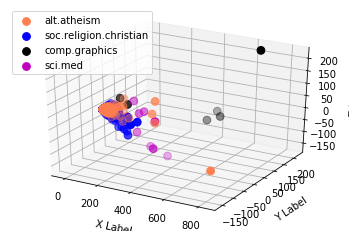

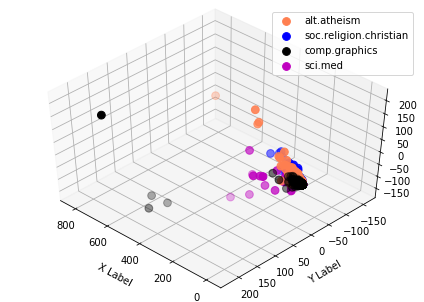

In [22]:
from sklearn.decomposition import PCA
# Answer here
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape
col = ['coral', 'blue', 'black', 'm']

# plot
## A. use only plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs,ys,zs, c=c, cmap="Set2_r", s=60,label = category)
    #ax.scatter(xs, ys, c = c, marker='o')

ax.legend(loc=0)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

## B.use Axes3D
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs,ys, zs, c=c, cmap="Set2_r", s=60,label = category)

ax.legend(loc=0)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
#ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])

plt.show()

#### Exercise 13:

In [23]:
term_frequencies2 = np.asarray(X_counts.sum(axis=0))[0]
# Answer here
import plotly.express as px
import plotly.graph_objects as go
amt = 50               #amount of features
X_=count_vect.get_feature_names()[:amt]
trace = go.Bar(x=np.arange(amt), y= term_frequencies2.tolist()[:amt],\
               text=term_frequencies2.tolist()[:amt],textposition='auto')
data = [trace]
layout = go.Layout(title='A Simple Plot', width=800, height=640)
fig = go.Figure(data=data, layout=layout)
#fig.update_yaxes(range=[0,400])
fig.update_xaxes(range=[-1, amt+0.5],ticktext=X_,tickvals=np.arange(0,len(term_frequencies2),1),
                 tickfont=dict(family='serif', color='black', size=10))
fig.show()

#### Exercise 14: 
efficiently reduce the number of terms you want to visualize as an exercise.

In [24]:
# Answer here


#### Exercise 15:

In [25]:
# Answer here
#sorted by its frequency
tmp3 = [(a,b) for a,b in zip(count_vect.get_feature_names(), term_frequencies2) ]
sort = sorted(tmp3, key=lambda s: s[1],reverse=True)    

x = list(map(lambda x:x[0],sort))   # feature_names sorted by frequencies
y = list(map(lambda x:x[1],sort))   # sorted term_frequency

amt = 50               #amount of features
X_=x[:amt]
Y_=y[:amt]

trace = go.Bar(x=np.arange(amt), y= Y_,\
               text=Y_,textposition='auto')
data = [trace]
layout = go.Layout(title='A Simple Plot', width=800, height=640)
fig = go.Figure(data=data, layout=layout)
#fig.update_yaxes(range=[0,400])
fig.update_xaxes(range=[-1, amt+0.5],ticktext=X_,tickvals=np.arange(0,len(term_frequencies2),1),
                 tickfont=dict(family='serif', color='black', size=10))
fig.show()

#### Exercise 16:

In [26]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
mlb.classes_
tmp=mlb.transform(X['category_name']).tolist()
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[:6]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   

            category_name bin_category_name  
0           comp.graphics      [0, 1, 0, 0]  
1           comp.graphics      [0, 1, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 1]  
3  soc.religion.christian      [0, 0, 0, 1]  
4  soc.religion.christian      [0, 0, 0, 1]  
5  soc.religion.christian      [0, 0, 0, 1]

# NEW DATASET

In [27]:
amazonPATH = './sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt'
imdbPATH = './sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt'
yelpPATH = './sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt'
PATHS = (amazonPATH,imdbPATH,yelpPATH)
SOURCE = ('amazon','imdb','yelp')

In [28]:
## importing data
txt_frame = pd.DataFrame()
for path,source in zip(PATHS,SOURCE):
    tmp = pd.DataFrame()
    fp = open(path, "r",encoding = 'utf8')
    lines = fp.readlines()
    LOGCOLS=['source','text','label']
    for idx,line in enumerate(lines):
        txt = line.split('\n')[0].split('\t')[0]
        label = line.split('\n')[0].split('\t')[1]
        logData = np.asarray([source,txt,label],dtype = object).reshape(1,-1)
        tmp= tmp.append(pd.DataFrame(logData,index = [idx] , columns =LOGCOLS ))
    txt_frame = txt_frame.append(tmp)

Data Preparation:
1. Arrange label & text into dataframe

In [29]:
txt_frame['label'] = txt_frame.label.apply(lambda x: 0 if x=='0' else 1)
txt_frame['cat_name'] = txt_frame.label.apply(lambda x: 'posi' if x==1 else 'neg')
print("Amount of labels:",len(txt_frame['label']),"\nAmount of txt:",len(txt_frame['text']))
txt_frame[:5]

Amount of labels: 3000 
Amount of txt: 3000


source                                               text  label cat_name
0  amazon  So there is no way for me to plug it in here i...      0      neg
1  amazon                        Good case, Excellent value.      1     posi
2  amazon                             Great for the jawbone.      1     posi
3  amazon  Tied to charger for conversations lasting more...      0      neg
4  amazon                                  The mic is great.      1     posi

In [30]:
txt_frame.iloc[::10, 0:3][0:3] 

source                                               text  label
0   amazon  So there is no way for me to plug it in here i...      0
10  amazon                    And the sound quality is great.      1
20  amazon  I went on Motorola's website and followed all ...      0

In [31]:
txt_frame.loc[lambda f: f.source == SOURCE[0]].iloc[::10,:][:5]

source                                               text  label cat_name
0   amazon  So there is no way for me to plug it in here i...      0      neg
10  amazon                    And the sound quality is great.      1     posi
20  amazon  I went on Motorola's website and followed all ...      0      neg
30  amazon  This is a simple little phone to use, but the ...      0      neg
40  amazon  It has a great camera thats 2MP, and the pics ...      1     posi

In [32]:
txt_frame.loc[lambda f: f.source == SOURCE[2]].iloc[::5,:][:5]

source                                               text  label cat_name
0    yelp                           Wow... Loved this place.      1     posi
5    yelp     Now I am getting angry and I want my damn pho.      0      neg
10   yelp                           Service was very prompt.      1     posi
15   yelp  I was shocked because no signs indicate cash o...      0      neg
20   yelp                                The Burrittos Blah!      0      neg

searching for the index of first 10 negative text in yelp data set

In [33]:
txt_frame.loc[txt_frame['source']==SOURCE[2]].loc[lambda f:f.label ==0][0:10].index

Int64Index([1, 2, 5, 6, 7, 11, 12, 14, 15, 17], dtype='int64')

# Data Mining using Pandas
-Missing Values

In [34]:
f_ama=txt_frame.loc[txt_frame['source']==SOURCE[0]]
f_imd=txt_frame.loc[txt_frame['source']==SOURCE[1]]
f_yel=txt_frame.loc[txt_frame['source']==SOURCE[2]]
print(f_ama[0:3])
print(f_imd[0:3])
print(f_yel[0:3])
f_ama.isnull().apply(lambda x: dmh.check_missing_values(x))

   source                                               text  label cat_name
0  amazon  So there is no way for me to plug it in here i...      0      neg
1  amazon                        Good case, Excellent value.      1     posi
2  amazon                             Great for the jawbone.      1     posi
  source                                               text  label cat_name
0   imdb  A very, very, very slow-moving, aimless movie ...      0      neg
1   imdb  Not sure who was more lost - the flat characte...      0      neg
2   imdb  Attempting artiness with black & white and cle...      0      neg
  source                                       text  label cat_name
0   yelp                   Wow... Loved this place.      1     posi
1   yelp                         Crust is not good.      0      neg
2   yelp  Not tasty and the texture was just nasty.      0      neg


source      (The amoung of missing records is: , 0)
text        (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
cat_name    (The amoung of missing records is: , 0)
dtype: object

In [35]:
f_imd.isnull().apply(lambda x: dmh.check_missing_values(x))

source      (The amoung of missing records is: , 0)
text        (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
cat_name    (The amoung of missing records is: , 0)
dtype: object

In [36]:
f_yel.isnull().apply(lambda x: dmh.check_missing_values(x))

source      (The amoung of missing records is: , 0)
text        (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
cat_name    (The amoung of missing records is: , 0)
dtype: object

# Dealing with Duplicate Data

In [37]:
print('NO. of duplicated data in f_ama:',sum(f_ama.duplicated()))
np.where(f_ama.duplicated()==True)

NO. of duplicated data in f_ama: 10


(array([285, 407, 524, 543, 744, 748, 778, 792, 892, 896], dtype=int64),)

In [38]:
print('NO. of duplicated data in f_imd:',sum(f_imd.duplicated()))
np.where(f_imd.duplicated()==True)

NO. of duplicated data in f_imd: 3


(array([363, 585, 788], dtype=int64),)

In [39]:
print('NO. of duplicated data in f_yel:',sum(f_yel.duplicated()))
np.where(f_yel.duplicated()==True)

NO. of duplicated data in f_yel: 4


(array([814, 816, 843, 846], dtype=int64),)

Delete the duplicated in original frame, then seperate 
the mother frame by soure of the text (for latter works).

After that, check if there still exist any duplicated data. 

In [40]:
txt_frame.drop_duplicates(keep='first', inplace=True) # keeping the first data
# check if there exist duplicated data
f_ama=txt_frame.loc[txt_frame['source']==SOURCE[0]]
f_imd=txt_frame.loc[txt_frame['source']==SOURCE[1]]
f_yel=txt_frame.loc[txt_frame['source']==SOURCE[2]]
print('NO. of duplicated data in f_ama:',sum(f_ama.duplicated()))
print('NO. of duplicated data in f_imd:',sum(f_imd.duplicated()))
print('NO. of duplicated data in f_yel:',sum(f_yel.duplicated()))

NO. of duplicated data in f_ama: 0
NO. of duplicated data in f_imd: 0
NO. of duplicated data in f_yel: 0


# Data Preprocessing

1.sampling: since the size of three datasets we used are not large, I don't think that we should scale down the size. The latter training performance might have correalation to the sample size.     

Here

In [41]:
len(txt_frame)

2983

In [42]:
sample = txt_frame.sample(n=2900)
len(sample)

2900

In [43]:
s_ama = sample.loc[sample['source'] == SOURCE[0]]
s_imd = sample.loc[sample['source'] == SOURCE[1]]
s_yel = sample.loc[sample['source'] == SOURCE[2]]

# Comparing the category disribution

imdb      997
yelp      996
amazon    990
Name: source, dtype: int64


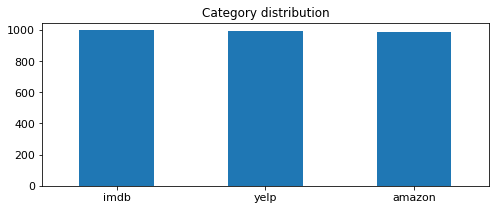

In [44]:
print(txt_frame.source.value_counts())
txt_frame.source.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    rot = 0, fontsize = 11, figsize = (8,3))


imdb      972
yelp      964
amazon    964
Name: source, dtype: int64


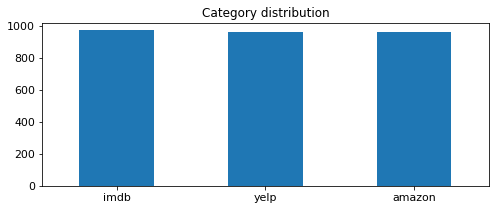

In [45]:
print(sample.source.value_counts())
sample.source.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',        
                                    rot = 0, fontsize = 11, figsize = (8,3))

**comparing the label distribution of each source in txt_frame (unsampled)

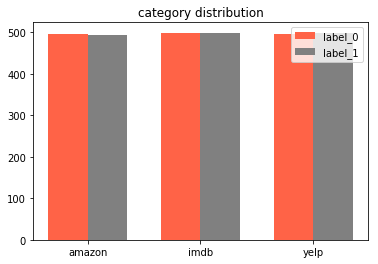

In [46]:
fig, ax = plt.subplots()
ind = np.arange(len(SOURCE))
width = 0.35
bottom = 0.35
for idex,(src,idx) in enumerate(zip(SOURCE,ind)):
    lab_0 = txt_frame.loc[txt_frame['source']==src].loc[lambda x: x.label == 0,:]
    lab_1 = txt_frame.loc[txt_frame['source']==src].loc[lambda x: x.label == 1,:]
    c1 = int(lab_0.label.value_counts())
    c2 = int(lab_1.label.value_counts())
    idx = int(idx)    
    p1 = ax.bar(idx, c1, width,bottom,color = 'tomato')
    p2 = ax.bar(idx+width, c2, width,bottom ,color = 'gray')

ax.set_title('category distribution')
ax.set_xticks(ind + width /2)
ax.set_xticklabels(SOURCE)

ax.legend((p1[0], p2[0]), ('label_0', 'label_1'))
ax.autoscale_view()

plt.show()

**comparing the label distribution of each source in txt_frame (sampled)

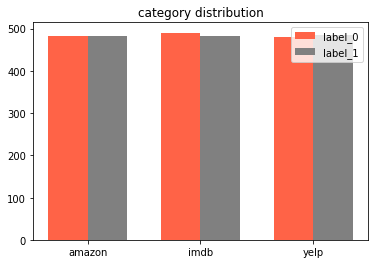

In [47]:
fig, ax = plt.subplots()
ind = np.arange(len(SOURCE))
width = 0.35
bottom = 0.35
for idex,(src,idx) in enumerate(zip(SOURCE,ind)):
    lab_0 = sample.loc[sample['source']==src].loc[lambda x: x.label == 0,:]
    lab_1 = sample.loc[sample['source']==src].loc[lambda x: x.label == 1,:]
    c1 = int(lab_0.label.value_counts())
    c2 = int(lab_1.label.value_counts())
    idx = int(idx)    
    p1 = ax.bar(idx, c1, width,bottom,color = 'tomato')
    p2 = ax.bar(idx+width, c2, width,bottom ,color = 'gray')

ax.set_title('category distribution')
ax.set_xticks(ind + width /2)
ax.set_xticklabels(SOURCE)

ax.legend((p1[0], p2[0]), ('label_0', 'label_1'))
ax.autoscale_view()

plt.show()

# Feature Creation

In [48]:
txt_frame['unigrams'] = txt_frame['text'].apply(lambda x: dmh.tokenize_text(x))

In [49]:
txt_frame[0:4]

source                                               text  label cat_name  \
0  amazon  So there is no way for me to plug it in here i...      0      neg   
1  amazon                        Good case, Excellent value.      1     posi   
2  amazon                             Great for the jawbone.      1     posi   
3  amazon  Tied to charger for conversations lasting more...      0      neg   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

Using nltk toolkit to tokenize and perform stemming on the text, I repalce the punctuation with ''.

In [50]:
import string
# remove punctuation
txt_frame['string']=txt_frame['text'].apply(lambda x:x.translate(str.maketrans('', '', string.punctuation)) )
txt_frame.iloc[0:4,:]

source                                               text  label cat_name  \
0  amazon  So there is no way for me to plug it in here i...      0      neg   
1  amazon                        Good case, Excellent value.      1     posi   
2  amazon                             Great for the jawbone.      1     posi   
3  amazon  Tied to charger for conversations lasting more...      0      neg   

                                            unigrams  \
0  [So, there, is, no, way, for, me, to, plug, it...   
1               [Good, case, ,, Excellent, value, .]   
2                      [Great, for, the, jawbone, .]   
3  [Tied, to, charger, for, conversations, lastin...   

                                              string  
0  So there is no way for me to plug it in here i...  
1                          Good case Excellent value  
2                              Great for the jawbone  
3  Tied to charger for conversations lasting more...

In [51]:
import nltk
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
ps = PorterStemmer() 
tmp = txt_frame['string'].apply(lambda x: word_tokenize(x)) #token
txt_frame['tokStem']=tmp    # save the tokenized text
print(txt_frame['string'][0:5])  #Before token
print(tmp[0:4])                  #After token

0    So there is no way for me to plug it in here i...
1                            Good case Excellent value
2                                Great for the jawbone
3    Tied to charger for conversations lasting more...
4                                     The mic is great
Name: string, dtype: object
0    [So, there, is, no, way, for, me, to, plug, it...
1                       [Good, case, Excellent, value]
2                           [Great, for, the, jawbone]
3    [Tied, to, charger, for, conversations, lastin...
Name: string, dtype: object


In [52]:
#stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = stopwords.words('english')
#stemming
from nltk.stem import PorterStemmer 
ps = PorterStemmer() 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words=stopword)
f_counts = count_vect.fit_transform(txt_frame.string)

In [54]:
f_counts.shape

(2983, 5259)

In [55]:
txt_frame.shape

(2983, 7)

In [56]:
analyze = count_vect.build_analyzer()
analyze(''.join(list(txt_frame.string)))

['way',
 'plug',
 'us',
 'unless',
 'go',
 'convertergood',
 'case',
 'excellent',
 'valuegreat',
 'jawbonetied',
 'charger',
 'conversations',
 'lasting',
 '45',
 'minutesmajor',
 'problemsthe',
 'mic',
 'greati',
 'jiggle',
 'plug',
 'get',
 'line',
 'right',
 'get',
 'decent',
 'volumeif',
 'several',
 'dozen',
 'several',
 'hundred',
 'contacts',
 'imagine',
 'fun',
 'sending',
 'one',
 'oneif',
 'razr',
 'owneryou',
 'must',
 'thisneedless',
 'say',
 'wasted',
 'moneywhat',
 'waste',
 'money',
 'timeand',
 'sound',
 'quality',
 'greathe',
 'impressed',
 'going',
 'original',
 'battery',
 'extended',
 'batteryif',
 'two',
 'seperated',
 'mere',
 'ft',
 'started',
 'notice',
 'excessive',
 'static',
 'garbled',
 'sound',
 'headsetvery',
 'good',
 'quality',
 'thoughthe',
 'design',
 'odd',
 'ear',
 'clip',
 'comfortable',
 'allhighly',
 'recommend',
 'one',
 'blue',
 'tooth',
 'phonei',
 'advise',
 'everyone',
 'fooledso',
 'far',
 'goodworks',
 'greatit',
 'clicks',
 'place',
 'way

In [57]:
count_vect.get_feature_names()[:10]

['010', '10', '100', '1010', '11', '110', '1199', '12', '13', '15']

In [58]:
f_counts[0:5, 0:20].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

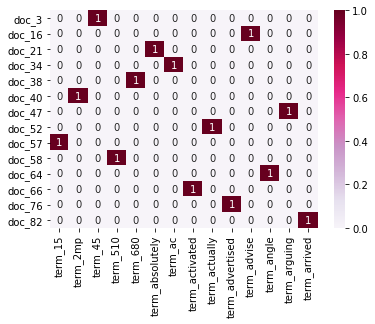

In [59]:
import seaborn as sns

ind_feat = 300
ind_doc = 100
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:ind_feat]] # feature 
plot_y = ["doc_"+ str(i) for i in list(txt_frame.index)[0:ind_doc]]                  # doc
plot_z = f_counts[0:ind_doc, 0:ind_feat].toarray()                                 # count
locat =  np.where(plot_z>0)
#print(locat)
plot_x = np.array(plot_x)[np.unique(locat[1])]
plot_y = np.array(plot_y)[np.unique(locat[0])]
#print(np.arange(120)[np.unique(locat[0])])

col = np.delete(np.arange(ind_doc),np.unique(locat[0]))
row = np.delete(np.arange(ind_feat),np.unique(locat[1]))
plot_z2 = np.delete(np.delete(plot_z,col,axis =0), row, axis = 1)

df_todraw = pd.DataFrame(plot_z2, columns = plot_x, index = plot_y)
plt.subplots()
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
plt.show()

### Dimensionality Reduction

In [60]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2,random_state =0).fit_transform(f_counts.toarray())
X_reduced.shape

(2983, 2)

#### plot the source distribution

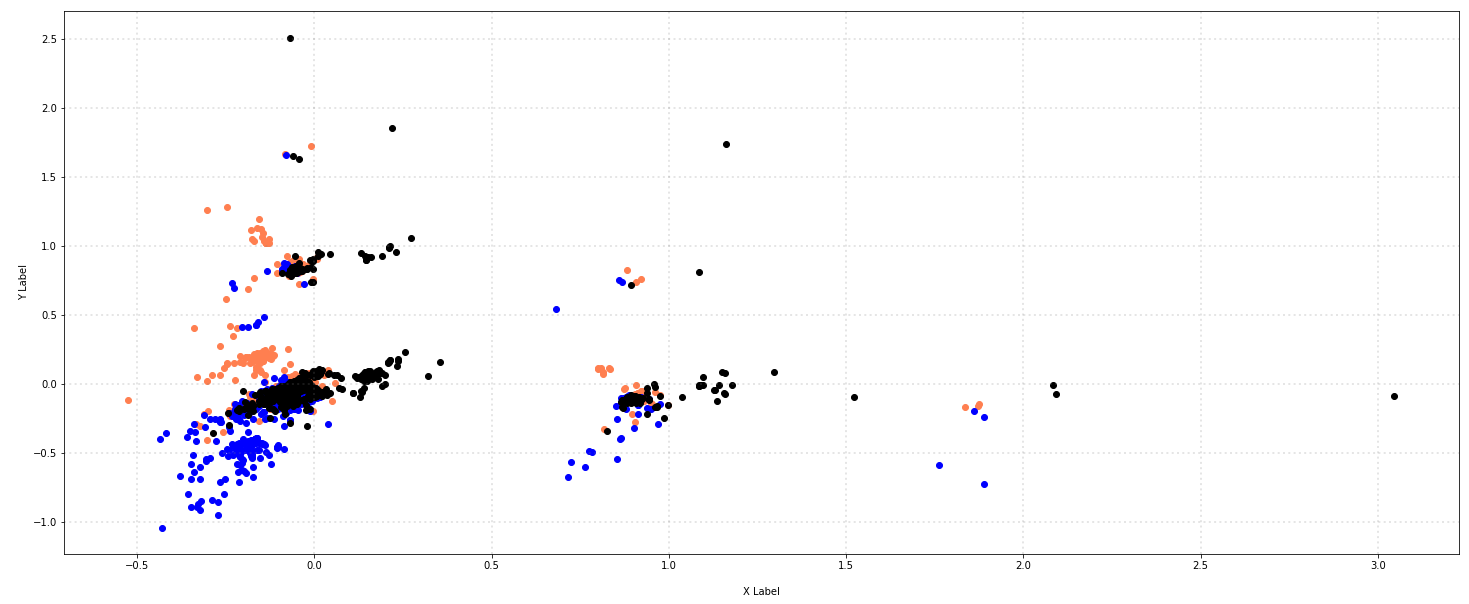

In [61]:
col = ['coral', 'blue', 'black', 'm']

# plot 2D 
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, src in zip(col, SOURCE):
    xs = X_reduced[txt_frame['source'] == src].T[0]
    ys = X_reduced[txt_frame['source'] == src].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

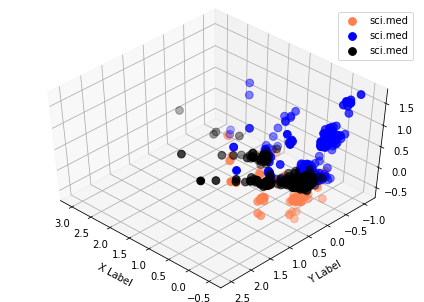

In [62]:
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3,random_state=0).fit_transform(f_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for c, src in zip(col, SOURCE):
    xs = X_reduced[txt_frame['source'] == src].T[0]
    ys = X_reduced[txt_frame['source'] == src].T[1]
    zs = X_reduced[txt_frame['source'] == src].T[2]

    ax.scatter(xs,ys, zs, c=c, cmap="Set2_r", s=60,label = category)

ax.legend(loc=0)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
#ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])

plt.show()

##### plot the label distribution in each source
--2D

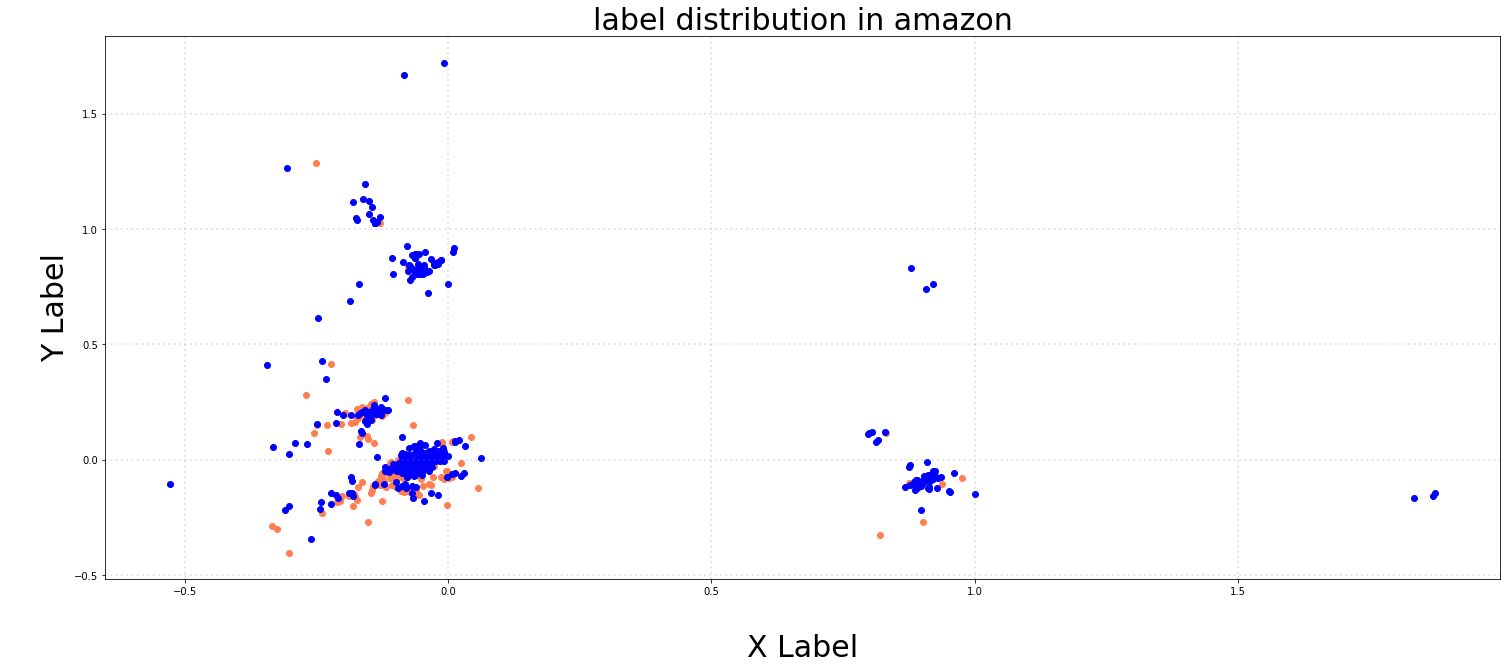

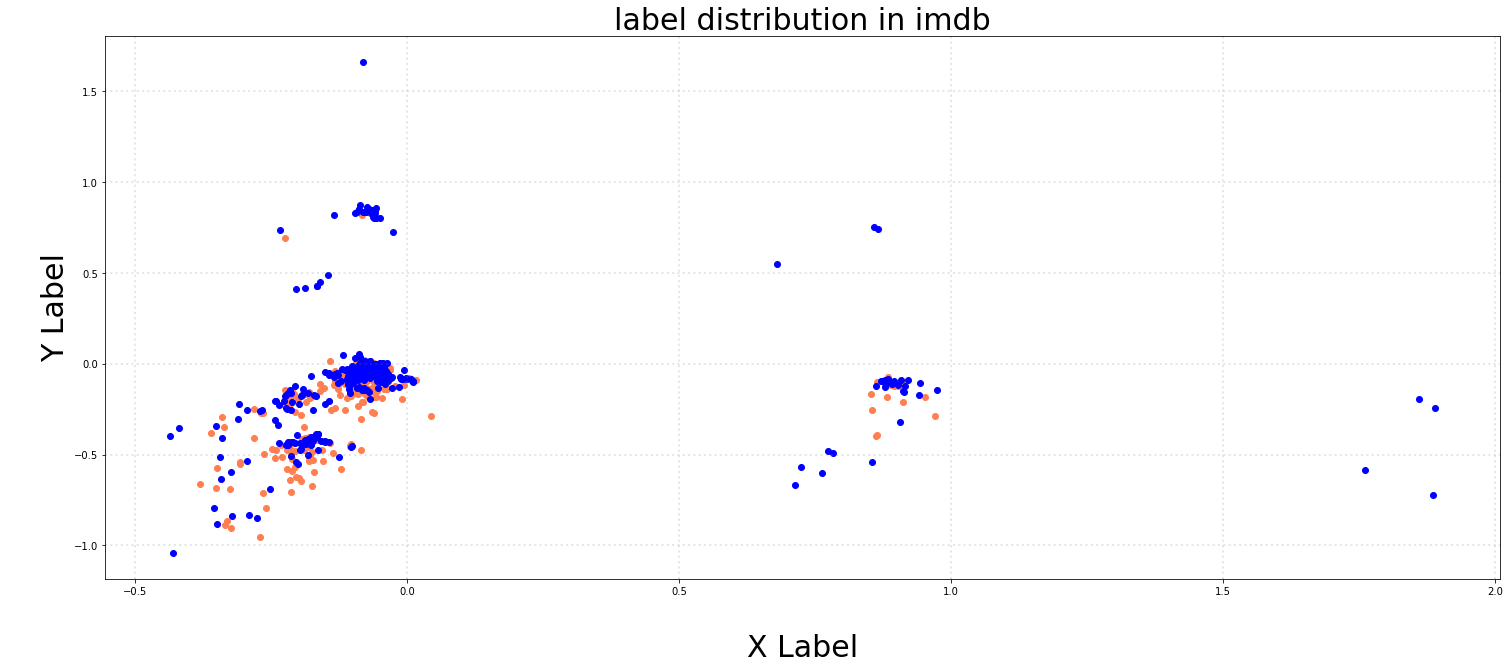

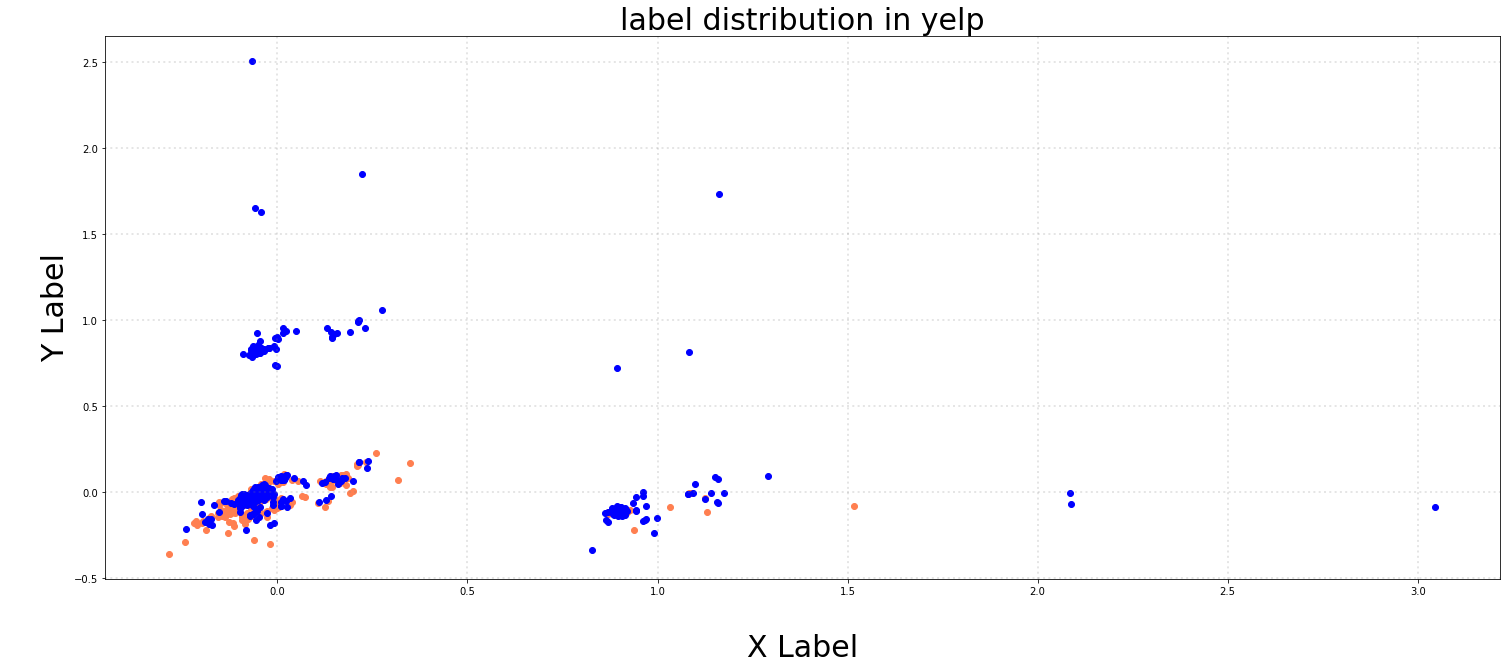

In [63]:
col = ['coral', 'blue']
def dist_label(X_reduced,src_frame,src):
    # plot 2D 
    fig = plt.figure(figsize = (25,10))
    ax = fig.subplots()
    label = [0,1]
    for c, lab in zip(col, label):
        xs = X_reduced[src_frame['label'] == lab].T[0]
        ys = X_reduced[src_frame['label'] == lab].T[1]

        ax.scatter(xs, ys, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label',fontsize=30)
    ax.set_ylabel('\nY Label',fontsize=30)
    plt.title('label distribution in {}'.format(src),fontsize=30)
    plt.show()
    
SRC_frame = [txt_frame.loc[txt_frame['source']==src] for src in SOURCE] 
RED_X = [X_reduced[txt_frame['source']==src] for src in SOURCE] 
for re_x,src_frame,src in zip(RED_X,SRC_frame,SOURCE):
    dist_label(re_x,src_frame,src)

Through the plots, we can oberseve that the distribution of two labels are overlapped,
which means it might be difficult to distinguish the label through 2-component PCA.
Maybe we should increase dimension to see if the labels can be identified by the distribution.



--3D

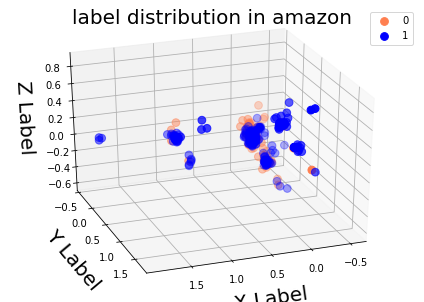

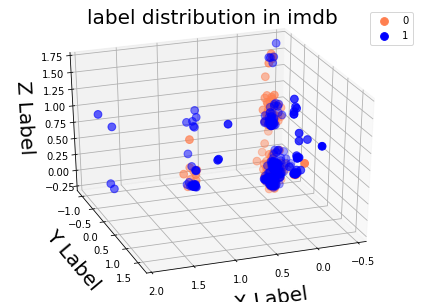

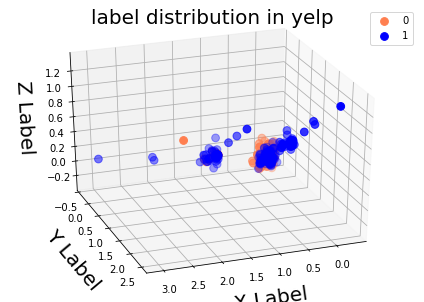

In [64]:
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3,random_state=0).fit_transform(f_counts.toarray())
col = ['coral', 'blue']
angle = 70
def dist_label(X_reduced,src_frame,src):
    fig = plt.figure(1)
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    plt.cla()
    label = [0,1]
    for c, lab in zip(col, label):
        xs = X_reduced[src_frame['label'] == lab].T[0]
        ys = X_reduced[src_frame['label'] == lab].T[1]
        zs = X_reduced[src_frame['label'] == lab].T[2]

        ax.scatter(xs,ys, zs, c=c, cmap="Set2_r", s=60,label = lab)

    ax.legend(loc=0)
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label',fontsize=20)
    ax.set_ylabel('\nY Label',fontsize=20)
    ax.set_zlabel('\nZ Label',fontsize=20)
    ax.view_init(30, angle)
    plt.title('label distribution in {}'.format(src),fontsize=20)
    plt.show()
SRC_frame = [txt_frame.loc[txt_frame['source']==src] for src in SOURCE] 
RED_X = [X_reduced[txt_frame['source']==src] for src in SOURCE] 
for re_x,src_frame,src in zip(RED_X,SRC_frame,SOURCE):
    dist_label(re_x,src_frame,src)

In 3D plot, we can see that blue dots and coral dots are overlapped. It might still be difficult to classify the labels by 3-dimension PCA.

### Atrribute Transformation / Aggregation

In [65]:
term_frequencies = []
for j in range(0,f_counts.shape[1]):
    term_frequencies.append(sum(f_counts[:,j].toarray()))
term_frequencies[0:10]

[array([2], dtype=int64),
 array([25], dtype=int64),
 array([3], dtype=int64),
 array([2], dtype=int64),
 array([1], dtype=int64),
 array([2], dtype=int64),
 array([1], dtype=int64),
 array([7], dtype=int64),
 array([2], dtype=int64),
 array([3], dtype=int64)]

In [66]:
term_frequencies2 = np.asarray(f_counts.sum(axis=0))[0]
len(term_frequencies2)

5259

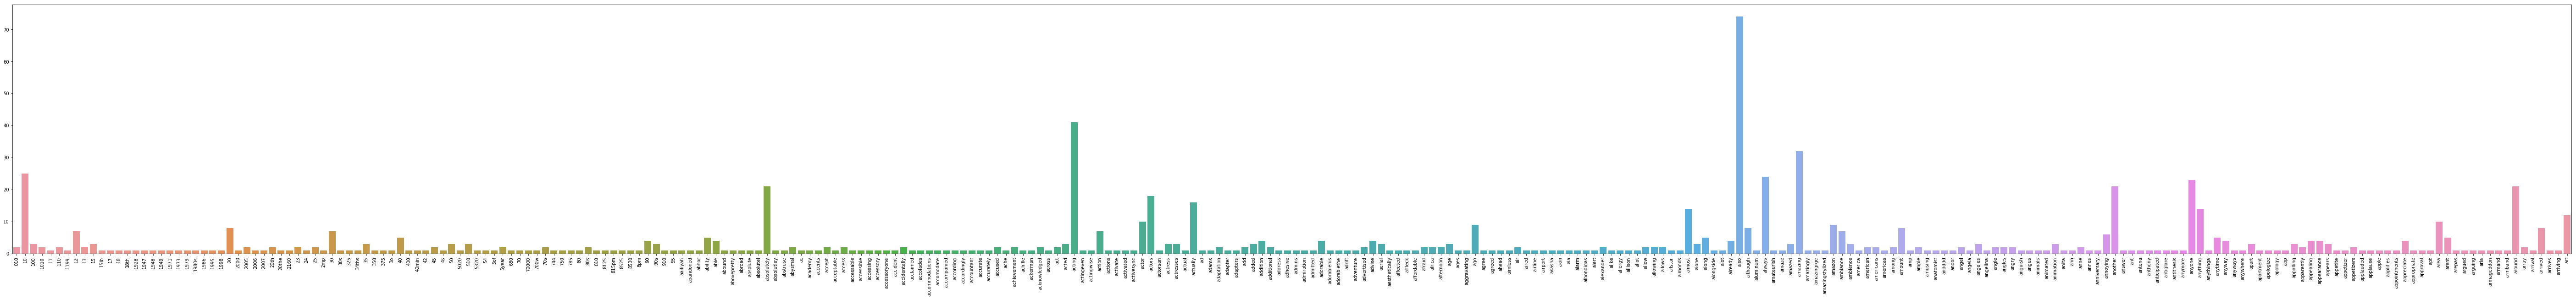

In [67]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies2[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

Then I plot the log-tail like distribution by sorting out the count-vectors and corresponing feauter names.
Through this plot, we can know what kind of the words will appear in the text of review frequently.

In [68]:
import plotly.express as px
import plotly.graph_objects as go
tmp3 = [(a,b) for a,b in zip(count_vect.get_feature_names(), term_frequencies2) ]
sort = sorted(tmp3, key=lambda s: s[1],reverse=True)    

x = list(map(lambda x:x[0],sort))   # feature_names sorted by frequencies
y = list(map(lambda x:x[1],sort))   # sorted term_frequency

amt = 50               #amount of features
X=x[:amt]
Y=y[:amt]

trace = go.Bar(x=np.arange(amt), y= Y,\
               text=Y,textposition='auto')
data = [trace]
layout = go.Layout(title='A Simple Plot of log-tail like distribution ', width=1000, height=640)
fig = go.Figure(data=data, layout=layout)
#fig.update_yaxes(range=[0,400])
fig.update_xaxes(range=[-1, amt+0.5],ticktext=X,tickvals=np.arange(0,len(term_frequencies2),1),
                 tickfont=dict(family='serif', color='black', size=10))
fig.show()

### Discretization and Binarization

In [69]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(txt_frame.label)
mlb.classes_
binar_lab = mlb.transform(txt_frame['label']).tolist()

In [70]:
binar_lab[0:10]

[[0], [1], [1], [0], [1], [0], [0], [1], [0], [0]]

In [71]:
txt_frame['label'][0:10]

0    0
1    1
2    1
3    0
4    1
5    0
6    0
7    1
8    0
9    0
Name: label, dtype: int64

The labels in this dataset are binary, so there's no need to transform into binary again. The results are as same as the un-transfromed. 

In [72]:
mlb = preprocessing.LabelBinarizer()
#combine source and label as new labels
src_lab = list(map(lambda x,y:str(x)+str(y), txt_frame['source'],txt_frame['label']))
# binary transformation
mlb.fit(src_lab)
mlb.classes_
binar_src_lab = mlb.transform(src_lab).tolist()
txt_frame['binar_src_lab'] =binar_src_lab


In [73]:
txt_frame.iloc[::1000,0:4][0:3]

source                                               text  label cat_name
0   amazon  So there is no way for me to plug it in here i...      0      neg
10    imdb               And those baby owls were adorable.        1     posi
13    yelp  I tried the Cape Cod ravoli, chicken,with cran...      1     posi

In [74]:
txt_frame.iloc[::1000,-1:][0:3]

binar_src_lab
0   [1, 0, 0, 0, 0, 0]
10  [0, 0, 0, 1, 0, 0]
13  [0, 0, 0, 0, 0, 1]

### Data Exploration

In [75]:
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity


## PART 3:
#===============1. new data visualization ============

(-0.5, 2999.5, 2999.5, -0.5)

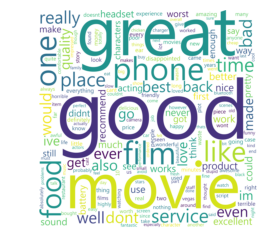

In [76]:
from wordcloud import WordCloud
# Generate a word cloud image
font = r'msjh.ttc'
# sorted the feature names by its frequency
tmp3 = [(a,b) for a,b in zip(count_vect.get_feature_names(), term_frequencies2) ]
sort = sorted(tmp3, key=lambda s: s[1],reverse=True) 
# frequency dictionary : frequency['feature_name']=term_frequency
frequency={}
for x in sort:
    frequency[x[0]]=x[1]

wordcloud_ = WordCloud(background_color="white",font_path=font,collocations=False, width=3000, height=3000, margin=2) 
wordcloud_.generate_from_frequencies(frequencies=frequency)
# Display the generated image:
plt.imshow(wordcloud_, interpolation='bilinear')
plt.axis("off")

#===============2. TF-IDF features ===================

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
# recall that "f_counts" is my counter vector of txt_frame
tfidf = transformer.fit_transform(f_counts)
txt_frame['tfidf'] = tfidf

In [78]:
tfidf.shape

(2983, 5259)

#===============3. Naive Bayes classifier ==================

### Using TFIDF as feature to train Naive Bayes 
I first train all the tfidf features(from all sources) by using GaussianNB.
I use 10-fold cross validation on features and  labels for the latter experiments.

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
def train(X_train,Y_train,X_test,smooth = 1e-9):
    clf = GaussianNB(var_smoothing =smooth )               
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return pred_train,pred_test
    
label = np.array(txt_frame['label'])
kf = KFold(n_splits=10, random_state= 0, shuffle= True)

smooth_list = [1e-9,1e-7,1e-5,1e-3,1e-2,1e-1,1]
for smooth in smooth_list: # grid search for the better smooth index
    predictTrain = []
    predictTest = []
    train_lab = []
    true_lab=[]
    for tr, ts in kf.split(tfidf):
        X_train = tfidf[tr].todense()    # training feature
        Y_train = label[tr]              # training label
        X_test = tfidf[ts].todense()     # test feature
        Y_test = label[ts]               # test label
        
        pred_train,pred_test= train(X_train,Y_train,X_test,smooth)

        predictTrain.extend(pred_train)
        predictTest.extend(pred_test)
        true_lab.extend(Y_test)
        train_lab.extend(Y_train)

    #=== Training result Evaluation====#
    train_lab = np.array(train_lab)
    true_lab = np.array(true_lab)
    predictTrain = np.array(predictTrain)
    predictTest = np.array(predictTest)
    uarTrain = recall_score(train_lab, predictTrain,average='macro')
    uarTest = recall_score(true_lab, predictTest, average='macro')
    accuTrain = accuracy_score(train_lab, predictTrain)
    accuTest = accuracy_score(true_lab,predictTest)
    cmTest = confusion_matrix(true_lab, predictTest)
    print('====== smooth index : ',smooth)
    print('uarTrain:',uarTrain)
    print('uarTest:',uarTest)
    print('confusion matrix(Test):\n',cmTest)

====== smooth index :  1e-09
uarTrain: 0.9231548119411841
uarTest: 0.6666540050436713
confusion matrix(Test):
 [[1180  313]
 [ 681  809]]
====== smooth index :  1e-07
uarTrain: 0.9393756995734006
uarTest: 0.6797500191048158
confusion matrix(Test):
 [[1167  326]
 [ 629  861]]
====== smooth index :  1e-05
uarTrain: 0.9588440312809516
uarTest: 0.6992326606939768
confusion matrix(Test):
 [[1138  355]
 [ 542  948]]
====== smooth index :  0.001
uarTrain: 0.9747404367285962
uarTest: 0.7291294497363536
confusion matrix(Test):
 [[1092  401]
 [ 407 1083]]
====== smooth index :  0.01
uarTrain: 0.9761259229623902
uarTest: 0.7509395074104208
confusion matrix(Test):
 [[1095  398]
 [ 345 1145]]
====== smooth index :  0.1
uarTrain: 0.9612707674342058
uarTest: 0.7915354428046768
confusion matrix(Test):
 [[1107  386]
 [ 236 1254]]
====== smooth index :  1
uarTrain: 0.9021039771481429
uarTest: 0.7718480425430533
confusion matrix(Test):
 [[ 942  551]
 [ 130 1360]]


Then we train the data from different sources seperately.

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
def train(X_train,Y_train,X_test,smooth = 1e-9):
    clf = GaussianNB(var_smoothing =smooth )               
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return pred_train,pred_test
def feature_(src):
    loc = np.where(txt_frame['source']==src)
    start = min(loc[0])
    end = max(loc[0])
    feature=tfidf[start:end+1]
    return feature 

smooth_list = [1e-9,1e-5,1e-3,1e-1,1]
 
for src in SOURCE:   #seperate the data by its source
    feature=feature_(src)
    label = np.array(txt_frame[txt_frame['source']==src]['label'])
    print('********data source: %s*******'%src)
    for smooth in smooth_list: # grid search for the better smooth index
        kf = KFold(n_splits=10, random_state= 0, shuffle= True)
        predictTrain = []
        predictTest = []
        train_lab = []
        true_lab=[]
        for tr, ts in kf.split(feature):
            X_train = feature[tr].todense()    # training feature
            Y_train = label[tr]              # training label
            X_test = feature[ts].todense()    # test feature
            Y_test = label[ts]               # test label
            
            pred_train,pred_test= train(X_train,Y_train,X_test,smooth)
            
            predictTrain.extend(pred_train)
            predictTest.extend(pred_test)
            true_lab.extend(Y_test)
            train_lab.extend(Y_train)

        #=== Training result Evaluation====#
        train_lab = np.array(train_lab)
        true_lab = np.array(true_lab)
        predictTrain = np.array(predictTrain)
        predictTest = np.array(predictTest)
        uarTrain = recall_score(train_lab, predictTrain,average='macro')
        uarTest = recall_score(true_lab, predictTest, average='macro')
        accuTrain = accuracy_score(train_lab, predictTrain)
        accuTest = accuracy_score(true_lab,predictTest)
        cmTest = confusion_matrix(true_lab, predictTest)
        print('====== smooth index : ',smooth,'=======')
        print('uarTrain:',uarTrain)
        print('uarTest:',uarTest)
        print('confusion matrix(Test):\n',cmTest)

********data source: amazon*******
====== smooth index :  1e-09 =======
uarTrain: 0.954728370221328
uarTest: 0.6953199929801935
confusion matrix(Test):
 [[300 197]
 [105 388]]
====== smooth index :  1e-05 =======
uarTrain: 0.9673597138385871
uarTest: 0.7003011986727667
confusion matrix(Test):
 [[311 186]
 [111 382]]
====== smooth index :  0.001 =======
uarTrain: 0.9821140047406367
uarTest: 0.7173956518012742
confusion matrix(Test):
 [[329 168]
 [112 381]]
====== smooth index :  0.1 =======
uarTrain: 0.9670225545293396
uarTest: 0.7341452365307464
confusion matrix(Test):
 [[265 232]
 [ 32 461]]
====== smooth index :  1 =======
uarTrain: 0.8191370444891571
uarTest: 0.6568763493741353
confusion matrix(Test):
 [[164 333]
 [  8 485]]
********data source: imdb*******
====== smooth index :  1e-09 =======
uarTrain: 0.9562695225345827
uarTest: 0.6990366274718111
confusion matrix(Test):
 [[379 120]
 [180 318]]
====== smooth index :  1e-05 =======
uarTrain: 0.9602855867916109
uarTest: 0.7020486756

### Using word frequency as features to train 

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
def train(X_train,Y_train,X_test,smooth = 1e-9):
    clf = GaussianNB(var_smoothing =smooth )               
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return pred_train,pred_test

feature = f_counts.toarray()    
label = np.array(txt_frame['label']).astype(int)
kf = KFold(n_splits=10, random_state= 0, shuffle= True)

smooth_list = [1e-9,1e-7,1e-5,1e-3,1e-2,1e-1]
for smooth in smooth_list: # grid search for the better smooth parameter
    predictTrain = []
    predictTest = []
    train_lab = []
    true_lab=[]
    for tr, ts in kf.split(feature):
        X_train = feature[tr]    # training feature
        Y_train = label[tr]              # training label
        X_test = feature[ts]     # test feature
        Y_test = label[ts]               # test label
        
        pred_train,pred_test= train(X_train,Y_train,X_test,smooth)

        predictTrain.extend(pred_train)
        predictTest.extend(pred_test)
        true_lab.extend(Y_test)
        train_lab.extend(Y_train)

    #=== Training result Evaluation====#
    train_lab = np.array(train_lab)
    true_lab = np.array(true_lab)
    predictTrain = np.array(predictTrain)
    predictTest = np.array(predictTest)
    uarTrain = recall_score(train_lab, predictTrain,average='macro')
    uarTest = recall_score(true_lab, predictTest, average='macro')
    accuTrain = accuracy_score(train_lab, predictTrain)
    accuTest = accuracy_score(true_lab,predictTest)
    cmTest = confusion_matrix(true_lab, predictTest)
    print('====== smooth index : ',smooth)
    print('uarTrain:',uarTrain)
    print('uarTest:',uarTest)
    print('confusion matrix(Test):\n',cmTest)

====== smooth index :  1e-09
uarTrain: 0.8702462348528779
uarTest: 0.6558395555096042
confusion matrix(Test):
 [[1293  200]
 [ 826  664]]
====== smooth index :  1e-07
uarTrain: 0.8809850892532041
uarTest: 0.6716133904529864
confusion matrix(Test):
 [[1290  203]
 [ 776  714]]
====== smooth index :  1e-05
uarTrain: 0.8989232126258608
uarTest: 0.6890832835109707
confusion matrix(Test):
 [[1260  233]
 [ 694  796]]
====== smooth index :  0.001
uarTrain: 0.9307391490889875
uarTest: 0.7226760677344386
confusion matrix(Test):
 [[1207  286]
 [ 541  949]]
====== smooth index :  0.01
uarTrain: 0.9507324761389593
uarTest: 0.7605968793969171
confusion matrix(Test):
 [[1205  288]
 [ 426 1064]]
====== smooth index :  0.1
uarTrain: 0.9266016703352908
uarTest: 0.8048618384676589
confusion matrix(Test):
 [[1250  243]
 [ 339 1151]]


In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
def train(X_train,Y_train,X_test,smooth = 1e-9):
    clf = GaussianNB(var_smoothing =smooth )               
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return pred_train,pred_test
def feature_(src):
    loc = np.where(txt_frame['source']==src)
    start = min(loc[0])
    end = max(loc[0])
    feature=f_counts.toarray()[start:end+1,:]
    return feature 

smooth_list = [1e-9,1e-5,1e-3,1e-1,1]
 
for src in SOURCE:   #seperate the data by its source
    feature=feature_(src)
    label = np.array(txt_frame[txt_frame['source']==src]['label']).astype(int)
    print('********data source: %s*******'%src)
    for smooth in smooth_list: # grid search for the better smooth index
        kf = KFold(n_splits=10, random_state= 0, shuffle= True)
        predictTrain = []
        predictTest = []
        train_lab = []
        true_lab=[]
        for tr, ts in kf.split(feature):
            X_train = feature[tr]    # training feature
            Y_train = label[tr]              # training label
            X_test = feature[ts]    # test feature
            Y_test = label[ts]               # test label
            
            pred_train,pred_test= train(X_train,Y_train,X_test,smooth)
            
            predictTrain.extend(pred_train)
            predictTest.extend(pred_test)
            true_lab.extend(Y_test)
            train_lab.extend(Y_train)

        #=== Training result Evaluation====#
        train_lab = np.array(train_lab)
        true_lab = np.array(true_lab)
        predictTrain = np.array(predictTrain)
        predictTest = np.array(predictTest)
        uarTrain = recall_score(train_lab, predictTrain,average='macro')
        uarTest = recall_score(true_lab, predictTest, average='macro')
        accuTrain = accuracy_score(train_lab, predictTrain)
        accuTest = accuracy_score(true_lab,predictTest)
        cmTest = confusion_matrix(true_lab, predictTest)
        print('====== smooth index : ',smooth,'=======')
        print('uarTrain:',uarTrain)
        print('uarTest:',uarTest)
        print('confusion matrix(Test):\n',cmTest)

********data source: amazon*******
====== smooth index :  1e-09 =======
uarTrain: 0.9491392801251957
uarTest: 0.6904612257724847
confusion matrix(Test):
 [[274 223]
 [ 84 409]]
====== smooth index :  1e-05 =======
uarTrain: 0.9495864073328861
uarTest: 0.691459099424131
confusion matrix(Test):
 [[276 221]
 [ 85 408]]
====== smooth index :  0.001 =======
uarTrain: 0.9581926991291903
uarTest: 0.7025010101175002
confusion matrix(Test):
 [[290 207]
 [ 88 405]]
====== smooth index :  0.1 =======
uarTrain: 0.8723442752525974
uarTest: 0.7020581909305733
confusion matrix(Test):
 [[220 277]
 [ 19 474]]
====== smooth index :  1 =======
uarTrain: 0.716605016622158
uarTest: 0.6256647389407439
confusion matrix(Test):
 [[136 361]
 [ 11 482]]
********data source: imdb*******
====== smooth index :  1e-09 =======
uarTrain: 0.9549308344489067
uarTest: 0.7160405147644687
confusion matrix(Test):
 [[411  88]
 [195 303]]
====== smooth index :  1e-05 =======
uarTrain: 0.9550423917893798
uarTest: 0.71604051476

-----------------------------------------------------------------
In the Naive Bayes experiments above,
I sellect several smooth parameter to trin the model, and I set up 4 models based on different condition.
(1)The model using the whole data(including Amazon, IMDB, Yeld) and the feature is TFIDF.
(2)The model using the data of Amazon, IMDB and Yeld seperately and the feature is TFIDF.

(3)The model using the whole data(including Amazon, IMDB, Yeld) and the feature is term frequency.
(4)The model using the data of Amazon, IMDB and Yeld seperately and the feature is term frequency.

NO matter which feature(tfidf and term frequencies) we use in the model(1) and (2), 
the results show that the uar Test will improve as the smooth parameter decreased.
and the uar results are pretty good.(the highest uar: 0.79)
In (3), the uar can reach 0.8.
while in (4), the highest uar is only 0.719.



## PART4:
most efficient and not efficient part in the dataset & what I have done to improve it. 